
##Business Analytics and Data Visualization
###Prof. Jose Mendoza

Chapter 6 - Exercise 28

File: breakfast.csv



> *Note: This notebook assumes that the file breakfast.csv is located in Google Drive, in a folder named 'Data'. *



In [2]:
# Read file congress.csv from Google Drive

from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
df = pd.read_csv('/content/drive/My Drive/Data/congress.csv')
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Member,Party,State,Vote 1,Vote 2,Vote 3,Vote 4,Vote 5,Vote 6,Vote 7,...,Vote 1638,Vote 1639,Vote 1640,Vote 1641,Vote 1642,Vote 1643,Vote 1644,Vote 1645,Vote 1646,Vote 1647
0,BONNER (R AL-1),Republican,AL,-1,1,-1,0,0,1,-1,...,-1,0,-1,-1,-1,-1,0,1,1,0
1,BRIGHT (D AL-2),Democrat,AL,1,-1,1,1,1,1,-1,...,1,1,0,0,0,0,0,0,0,0
2,ROGERS (R AL-3),Republican,AL,-1,1,-1,-1,-1,1,-1,...,-1,-1,-1,-1,-1,1,-1,-1,1,1
3,ADERHOLT (R AL-4),Republican,AL,-1,1,-1,-1,1,1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,1,1
4,GRIFFITH (D/R AL-5),Democrat/Republican,AL,1,-1,1,1,1,-1,-1,...,0,0,0,0,0,0,0,0,0,0


In [3]:
# Remove the non-numeric columns

df_numeric = df.select_dtypes(include=['number'])
df_numeric.head()


,Vote 1,Vote 2,Vote 3,Vote 4,Vote 5,Vote 6,Vote 7,Vote 8,Vote 9,Vote 10,...,Vote 1638,Vote 1639,Vote 1640,Vote 1641,Vote 1642,Vote 1643,Vote 1644,Vote 1645,Vote 1646,Vote 1647
0,-1,1,-1,0,0,1,-1,-1,1,1,...,-1,0,-1,-1,-1,-1,0,1,1,0
1,1,-1,1,1,1,1,-1,-1,1,1,...,1,1,0,0,0,0,0,0,0,0
2,-1,1,-1,-1,-1,1,-1,-1,1,1,...,-1,-1,-1,-1,-1,1,-1,-1,1,1
3,-1,1,-1,-1,1,1,-1,-1,1,1,...,-1,-1,-1,-1,-1,-1,-1,-1,1,1
4,1,-1,1,1,1,-1,-1,-1,1,1,...,0,0,0,0,0,0,0,0,0,0


In [5]:
# Perform Principal Component Analysis

from sklearn.preprocessing import StandardScaler
x = StandardScaler().fit_transform(df_numeric)

from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
principalDf.head()

,principal component 1,principal component 2
0,26.540539,-3.416646
1,9.130025,-5.358920
2,24.602280,-9.951457
3,26.067653,-6.182540
4,4.592154,-1.066587


In [6]:
# Explain the variance of the PCA

print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [0.36376611 0.12959763]


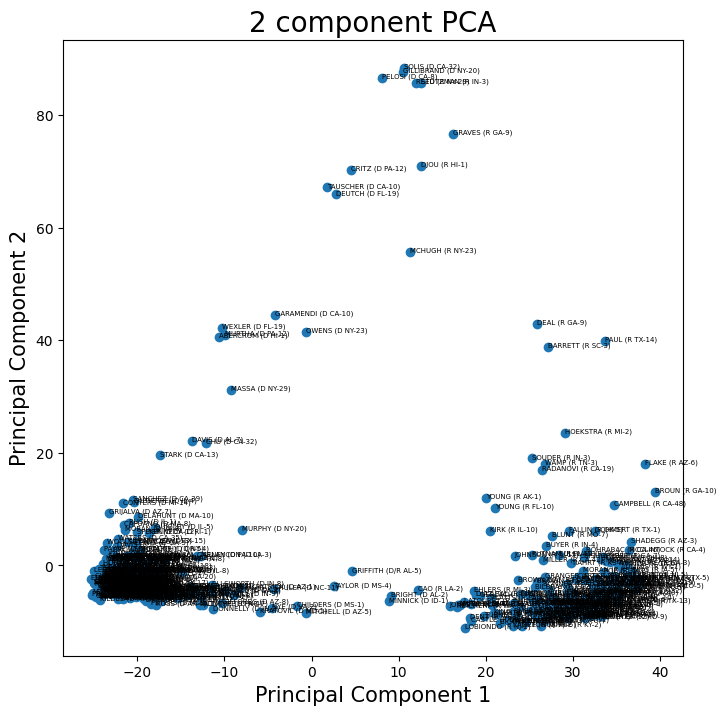

In [13]:
# Plot the PCA using a scatter plots

import matplotlib.pyplot as plt

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)

ax.scatter(principalDf['principal component 1'], principalDf['principal component 2'])
# Add the labels to the plot
for i, txt in enumerate(df['Member']):
    ax.annotate(txt, (principalDf['principal component 1'][i], principalDf['principal component 2'][i]), fontsize=5)

plt.show()

In [12]:
# Optional: Making the Scatter Plot interactive for a better visualization

!pip install plotly
!pip install cufflinks

import plotly.express as px

fig = px.scatter(principalDf, x='principal component 1', y='principal component 2', text=df['Member'])
fig.update_traces(textposition='top center')
fig.show()

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 7.1 MB/s eta 0:00:00
